In [329]:
import warnings
warnings.filterwarnings("ignore")

In [330]:
import pandas as pd
df = pd.read_excel('Project_Data.xls', sheet_name='EmailReport')

In [331]:
## Importing libs and dependencies.
import os
import pandas as pd
import numpy as np

In [332]:
## Rows and column count for our data
print(df.shape)

(9486, 7)


In [333]:
df.head(3).T

,0,1,2
ConversationId,AAQkAGVjMmUyMDljLTAyMzYtNGU0MC1iOGFmLWI3NWQzM2...,AAQkAGVjMmUyMDljLTAyMzYtNGU0MC1iOGFmLWI3NWQzM2...,AAQkAGVjMmUyMDljLTAyMzYtNGU0MC1iOGFmLWI3NWQzM2...
Subject,5130 Browns Pt Blvd Unit D - Landscaping,Fwd: 5130 Browns Pt Blvd Unit D - Landscaping,RE: 5130 Browns Pt Blvd Unit D - Landscaping
Body,"Dear Propvivo, \r\nThank you for the recent le...","Sorry , here are the pictures. [cid:0DD370C3-6...","Dear Russ & Shanna,\r\n\r\nWe Thank You for yo..."
Category,Maintenance,Maintenance,Maintenance
HasAttachment,False,False,False
DateTimeReceived,2019-10-09 20:02:06,2019-10-09 20:10:03,2019-10-09 22:31:00
UnitNumber,Unit # 5130D,Unit # 5130D,Unit # 5130D


In [334]:
## Based on my initial analysis. I think we will not require (ConversationId,UnitNumber)
## Category sees to be the lable and that's what we want to predict based on the Subject and Category of the data.

In [335]:
print(df["Category"].value_counts())

Approval          176
Approvru           77
Mae te ance        57
SfHoeroou lk       45
Ni PngPDrri        42
                 ... 
20et21tif w         1
DaettetB ta         1
Meeontoeenajy       1
9 StCBtelcep        1
Tiomonmomeowrb      1
Name: Category, Length: 995, dtype: int64


<AxesSubplot:>

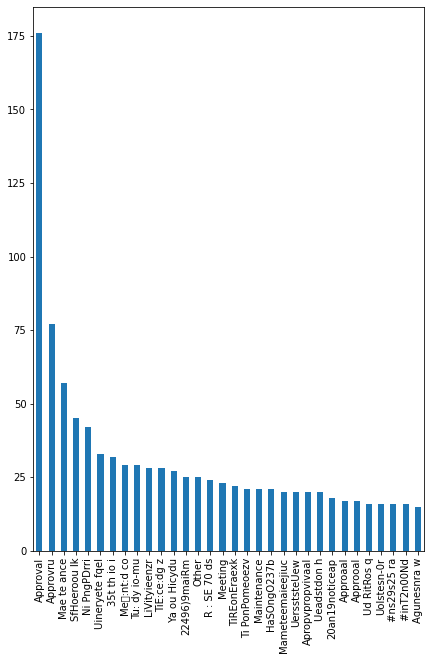

In [336]:
df['Category'].value_counts().head(32).plot(kind='bar', figsize=(7,10))

In [337]:
total_count = df["Category"].value_counts().sum()
print(f"Total category occurance count: {total_count}")

Total category occurance count: 3210


In [338]:
num_categories = len(df["Category"].unique())
print(f"Number of unique categories: {num_categories}")
print(f"Average category occurrence: {total_count / num_categories}")

Number of unique categories: 996
Average category occurrence: 3.2228915662650603


In [339]:
df['Category'].unique()

array(['Maintenance', 'Other', 'Payment', 'HOA Demand Request',
       'Information', 'Update', 'Violations', 'Insurance', 'Documents',
       'Meeting', 'Approval', 'Governing Documents', 'Discussion',
       'Contract', 'Bidding', 'Documents Request', 'Reservation',
       ' Maintenance', 'Rental', 'Form', nan, '20re21eeev', 'Mi: sh ict',
       'Approvru', 'Apru', 'Apal', 'Apropvpropvivaru', '23-A9)AmaiRqaf',
       'Meeontoeenno', ' Kttitt002l', 'TiPlnglla jm', 'HoatA)tdryl',
       'D teCBe Wcv', '20ea21aty', 'TiCoonoedzr', 'Sound', 'Otatements B',
       'A n wa lvAm', 'Ovb  1 eenl', 'Electronic', 'Ti PonPomeoezv',
       'OIllaheete', ' EW:nd:n /q', ' EE:nd:n /q', ' Ey:nd:n /q',
       ' Ee:nd:n /q', 'TiPlnglla wix', 'Tiamcemnu n', 'Liuncynn-na',
       '20et21tif u', 'TiPlnglla d', 'Astostokehru', 'Astostokehal',
       'Aprpropsal', 'Approoal', 'Aimpacimpactpeal', '9 StCBtelcen',
       'O&ng', 'Ply  W 190t', 'TiMHonHrrtv', 'Tirscesnu w', '20ed19dg tg',
       'Uineryete r', '

In [340]:
## Applying domain knowledge of email category to analyse the categorys.

### 1) A lot of category label do not make any sense.
### 2) Some of the lable are in different language.

In [341]:
df.isnull().sum()

ConversationId         0
Subject                0
Body                  70
Category            6276
HasAttachment          0
DateTimeReceived       0
UnitNumber          6523
dtype: int64

In [342]:
## So our data set is missing a lot of lables to train on (6276 out of 9486) rows do not contain a lable.


In [343]:
# Removing ConversationId and UnitNumber
df = df.drop(['ConversationId','UnitNumber'], axis=1)

In [344]:
#Check if we have duplicates values
df.duplicated().sum()
## will come back to it later

7

In [345]:
## Visualizing how the category values are distributed!

In [346]:
max_count=10
counts = df["Category"].value_counts()
filtered_counts = counts[(counts >= 1) & (counts <= max_count)]
print(f"Number of categories with occurance count between 1 and {max_count}: {filtered_counts.sum()}. This makes {round(((filtered_counts.sum()/total_count)*100),2)}% of total categories")

Number of categories with occurance count between 1 and 10: 1945. This makes 60.59% of total categories


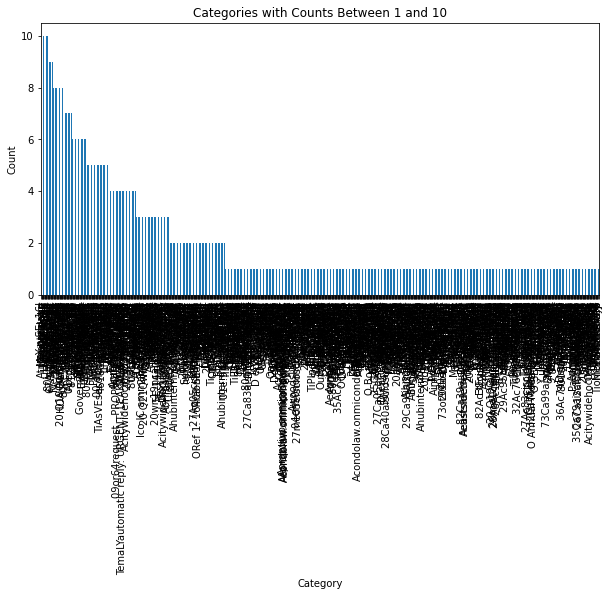

In [347]:
##Warning: Don't run this if your device is slow

import matplotlib.pyplot as plt
try:
    plt.figure(figsize=(10, 5))
    filtered_counts.plot(kind='bar')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Categories with Counts Between 1 and {max_count}')
    plt.show()
except:
    pass

In [348]:
#The trend graph clearly shows that most of the category only got one occurance in over 3500 entry.
#And we know that statics does not work on this low count. The data is heavily skewed, we will have to make do some data preprocessing.

In [349]:
pd.DataFrame(df.Category.unique()).values

array([['Maintenance'],
       ['Other'],
       ['Payment'],
       ['HOA Demand Request'],
       ['Information'],
       ['Update'],
       ['Violations'],
       ['Insurance'],
       ['Documents'],
       ['Meeting'],
       ['Approval'],
       ['Governing Documents'],
       ['Discussion'],
       ['Contract'],
       ['Bidding'],
       ['Documents Request'],
       ['Reservation'],
       [' Maintenance'],
       ['Rental'],
       ['Form'],
       [nan],
       ['20re21eeev'],
       ['Mi: sh ict'],
       ['Approvru'],
       ['Apru'],
       ['Apal'],
       ['Apropvpropvivaru'],
       ['23-A9)AmaiRqaf'],
       ['Meeontoeenno'],
       [' Kttitt002l'],
       ['TiPlnglla jm'],
       ['HoatA)tdryl'],
       ['D teCBe Wcv'],
       ['20ea21aty'],
       ['TiCoonoedzr'],
       ['Sound'],
       ['Otatements B'],
       ['A n wa lvAm'],
       ['Ovb  1 eenl'],
       ['Electronic'],
       ['Ti PonPomeoezv'],
       ['OIllaheete'],
       [' EW:nd:n /q'],
       [' EE:nd:n 

In [350]:
# Just for testing if we can't seperate categories which are in english

In [164]:
## Not going to use this in production
import numpy as np
from langdetect import detect

def detect_language(label):
    return detect(label)

categories = np.array(df['Category'].unique())

english_categories = []
for word in categories:
    try:
        if isinstance(word, str) and detect_language(word) == "en":
            english_categories.append(word)
    except Exception as e:
        continue
    

# print(english_categories)  

In [165]:
len(english_categories)

175

In [351]:
## Dropping all the rows where category is not defined as we can't use it for training. (~ 6500 rows will be removed)

df= df.dropna(subset=['Category'],axis = 0)

In [352]:
df.isnull().sum()

Subject              0
Body                11
Category             0
HasAttachment        0
DateTimeReceived     0
dtype: int64

In [353]:
df.shape

(3210, 5)

In [354]:
## Removing any unnecessary characters, such as punctuation and special symbols, converting all words to lowercase, and removing any stop words or irrelevant words from the categories.
import re
def normalize_category(text):
    if(not text):
        return
    text=str(text)

   #1. Normalize: Convert to lower case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.strip())
    
    # not performing tokenization and other operation on the labels
 
    return text

df['Category'] = df['Category'].apply(lambda x: normalize_category(x))


In [355]:
## Iteration 1

In [356]:
## First itertation with only Subject and Body and run basic npl classification algorithm

In [357]:

# import libraries

#Load-data Libraries
import pandas as pd

#Text Processing libraries
import nltk
# nltk.download('stopwords')
# nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re


#Model libraries
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#Save the model
import joblib
from joblib import dump, load

#Evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [358]:
# removing all other columns which are not required.
data = df.drop(['HasAttachment','DateTimeReceived'], axis=1)

In [359]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [360]:
def tokenize(text):
    text=str(text)

   #1. Normalize: Convert to lower case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower().strip())
    
   #2. Tokenizing: split text into words
    tokens = word_tokenize(text)
    
   #3. Remove stop words: if a token is a stop word, then remove it
    words = [w for w in tokens if w not in stopwords.words("english")]
    
    #4. Lemmatize and Stemming
    lemmed_words = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    clean_tokens = []
    
    for i in lemmed_words:
        clean_tokens.append(i)
        
        ## back to string from list
    text = " ".join(clean_tokens)
    return text

    #return clean_tokens   

In [361]:
data['Subject'] = data['Subject'].apply(lambda x: tokenize(x))
data['Body'] = data['Body'].apply(lambda x: tokenize(x))
data.head()

,Subject,Body,Category
0,5130 brown pt blvd unit landscaping,dear propvivo thank recent letter regarding do...,Maintenance
1,fwd 5130 brown pt blvd unit landscaping,sorry picture cid 0dd370c3 626d 4cf2 9464 478e...,Maintenance
2,5130 brown pt blvd unit landscaping,dear rus shanna thank prompt attention matter ...,Maintenance
3,file number 3645595 address 12526 se 32nd st u...,file 4244 3645595 buyer amanda arizala oswaldo...,Other
4,file number 3645595 address 12526 se 32nd st u...,hi please confirm rush delivery normal deliver...,Payment


In [362]:
## Will removing numbers will change the result? -> will come back to it

In [363]:
X = data['Subject']+" "+data["Body"]
y = data['Category']

In [364]:
#split data into training 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [365]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB())
    ])

In [366]:
#train pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7f84c8372040>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [367]:
# Predit using the trained model
predicted = pipeline.predict(X_test)

In [368]:

from sklearn.metrics import accuracy_score
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, predicted)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, predicted))

Accuracy: 0.05
Other Metrics:
                                                   precision    recall  f1-score   support

                                       12VstVmadx       0.00      0.00      0.00         1
                                       1olstlLeMy       0.00      0.00      0.00         2
                                       2CAndAncLo       0.00      0.00      0.00         2
                                    3E rd l itbgz       0.00      0.00      0.00         2
                                       CInomnzaoi       0.00      0.00      0.00         2
                                        inT2n00Nd       0.00      0.00      0.00         2
                                       ns29s25 ra       0.00      0.00      0.00         4
                               01e 9  elease   ar       0.00      0.00      0.00         3
                                     02874 7maiRj       0.00      0.00      0.00         1
                                   02qu81ussuedoj       0.0

In [369]:
## So as we see the basic test fails and we can find lot of insght from it.
### 1) Number of categorys are too huge and training varity is not available for it
### 2) We will have to reduce the number of categories and train the model on different algorithms.

In [370]:
## Iteration 2 (Reducing the number of categories by using domain knowledge.) =>> Target is to reduce the number of categories to 20-25


In [371]:
import pandas as pd

old_names = ['Approval', 'Approvru', 'Approoal', 'Approuru', 'Approtal', 'Approoru', 'Approcal', 'Approaal', 'Approcru', 'Approrru', 'Approsal', 'Approual', 'Approwal', 'Approaru', 'Approiru', 'Appronru', 'Appronal', 'Approial', 'Approlal', 'ApproTal', 'Approral', 'Approtru', 'Approeal']
new_name = "Approval"
category_array = ['Maintenance', 'Other', 'Payment', 'Hoa Demand Request', 'Information', 'Update', 'Violations', 'Insurance', 'Documents', 'Meeting', 'Approval', 'Governing Documents', 'Discussion', 'Reserve', 'Contract', 'Bidding', 'Documents Request', 'Reservation', 'Legal', 'Rental', 'Form', 'Electronic', 'Re', 'Resale', 'Works', 'Renting', 'Association', 'Request', 'Stuck', 'Annual', 'Terrace', 'Due']

category_array.extend(old_names)
df2 = data[data["Category"].isin(category_array)]
df2["Category"].replace(to_replace=old_names, value=new_name, inplace=True)


In [372]:
df2['Subject'] = df2['Subject'].apply(lambda x: tokenize(x))
df2['Body'] = df2['Body'].apply(lambda x: tokenize(x))
df2.head()

,Subject,Body,Category
0,5130 brown pt blvd unit landscaping,dear propvivo thank recent letter regarding do...,Maintenance
1,fwd 5130 brown pt blvd unit landscaping,sorry picture cid 0dd370c3 626d 4cf2 9464 478e...,Maintenance
2,5130 brown pt blvd unit landscaping,dear ru shanna thank prompt attention matter r...,Maintenance
3,file number 3645595 address 12526 se 32nd st u...,file 4244 3645595 buyer amanda arizala oswaldo...,Other
4,file number 3645595 address 12526 se 32nd st u...,hi please confirm rush delivery normal deliver...,Payment


<AxesSubplot:>

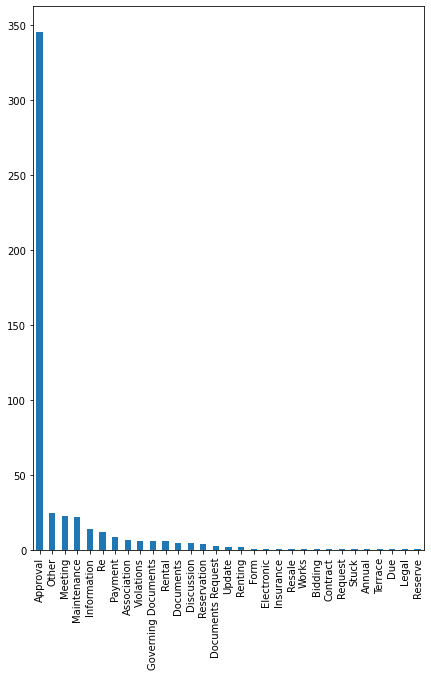

In [373]:
df2['Category'].value_counts().head(32).plot(kind='bar', figsize=(7,10))

In [374]:
X = df2['Subject']+" "+df2["Body"]
y = df2['Category']

In [375]:
#split data into training 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [376]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB())
    ])

In [377]:
#train pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7f84c8372040>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [378]:
# Predit using the trained model
predicted = pipeline.predict(X_test)

In [379]:

from sklearn.metrics import accuracy_score
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, predicted)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, predicted))

Accuracy: 0.66
Other Metrics:
                   precision    recall  f1-score   support

         Approval       0.66      1.00      0.79        67
      Association       0.00      0.00      0.00         1
       Discussion       0.00      0.00      0.00         1
Documents Request       0.00      0.00      0.00         3
      Information       0.00      0.00      0.00         4
      Maintenance       0.00      0.00      0.00         7
          Meeting       0.00      0.00      0.00         2
            Other       0.00      0.00      0.00         8
          Payment       0.00      0.00      0.00         2
               Re       0.00      0.00      0.00         3
           Rental       0.00      0.00      0.00         1
          Renting       0.00      0.00      0.00         1
          Request       0.00      0.00      0.00         1
       Violations       0.00      0.00      0.00         1

         accuracy                           0.66       102
        macro avg       

In [380]:
## Iteration 3

In [381]:
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [382]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['Category'].factorize()[0]
category_id_df = df2[['Category', 'category_id']].drop_duplicates()
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
# New dataframe
df2.head()

,Subject,Body,Category,category_id
0,5130 brown pt blvd unit landscaping,dear propvivo thank recent letter regarding do...,Maintenance,0
1,fwd 5130 brown pt blvd unit landscaping,sorry picture cid 0dd370c3 626d 4cf2 9464 478e...,Maintenance,0
2,5130 brown pt blvd unit landscaping,dear ru shanna thank prompt attention matter r...,Maintenance,0
3,file number 3645595 address 12526 se 32nd st u...,file 4244 3645595 buyer amanda arizala oswaldo...,Other,1
4,file number 3645595 address 12526 se 32nd st u...,hi please confirm rush delivery normal deliver...,Payment,2


In [383]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Subject +' '+df2.Body).toarray()
labels = df2.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 510 complaints is represented by 3096 features (TF-IDF score of unigrams and bigrams)


In [384]:
# Now, we will find the most correlated terms with each of the defined product categories. Here we are finding only three most correlated terms.

# Finding the three most correlated terms with each of the product categories
N = 3
for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("n==> %s:" %(Category))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

n==> Annual:
  * Most Correlated Unigrams are: sara, quorum, requirement
  * Most Correlated Bigrams are: annual meeting, 2021 annual, thank anna
n==> Approval:
  * Most Correlated Unigrams are: thanks, interior, 39
  * Most Correlated Bigrams are: rental unit, unit 39, 2021 annual
n==> Association:
  * Most Correlated Unigrams are: 191st, 3115, 101283
  * Most Correlated Bigrams are: 98012 srivastava, 191st place, 3115 191st
n==> Bidding:
  * Most Correlated Unigrams are: pro, cleaning, clean
  * Most Correlated Bigrams are: export download, com uc, unsubscribe http
n==> Contract:
  * Most Correlated Unigrams are: pv, lang, contract
  * Most Correlated Bigrams are: propvivo cid, pv ca, dear board
n==> Discussion:
  * Most Correlated Unigrams are: specific, hold, shore
  * Most Correlated Bigrams are: monday march, owner know, sammamish shore
n==> Documents:
  * Most Correlated Unigrams are: pv, february, financials
  * Most Correlated Bigrams are: pv ca, dear board, financials februar

In [385]:
# The classification models which we are using:

# Random Forest
# Linear Support Vector Machine
# Multinomial Naive Bayes
# Logistic Regression.

In [386]:
X = df2['Subject']+" "+df2["Body"] # Collection of documents
y = df2['Category'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [387]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
print(cv_df)

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.686275
1   RandomForestClassifier         1  0.696078
2   RandomForestClassifier         2  0.705882
3   RandomForestClassifier         3  0.686275
4   RandomForestClassifier         4  0.696078
5                LinearSVC         0  0.725490
6                LinearSVC         1  0.794118
7                LinearSVC         2  0.823529
8                LinearSVC         3  0.794118
9                LinearSVC         4  0.745098
10           MultinomialNB         0  0.696078
11           MultinomialNB         1  0.656863
12           MultinomialNB         2  0.676471
13           MultinomialNB         3  0.549020
14           MultinomialNB         4  0.696078
15      LogisticRegression         0  0.686275
16      LogisticRegression         1  0.715686
17      LogisticRegression         2  0.715686
18      LogisticRegression         3  0.735294
19      LogisticRegression         4  0.705882


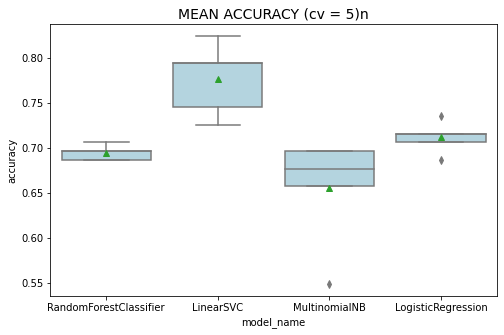

In [388]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [ ]:
## We can see the SVM is giving the best results so we will be using it for the final model.

In [389]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels, df2.index, test_size=0.25, random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [390]:
# Classification report
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Category'].unique()[:16]))

ttttCLASSIFICATIION METRICSn
                     precision    recall  f1-score   support

        Maintenance       0.50      1.00      0.67         1
              Other       0.25      0.20      0.22         5
            Payment       0.00      0.00      0.00         5
        Information       0.20      1.00      0.33         1
             Update       1.00      1.00      1.00         2
         Violations       1.00      0.50      0.67         2
          Insurance       0.86      1.00      0.92         6
          Documents       0.87      0.97      0.91        89
            Meeting       1.00      1.00      1.00         2
           Approval       1.00      1.00      1.00         1
Governing Documents       0.00      0.00      0.00         1
         Discussion       0.00      0.00      0.00         0
           Contract       0.00      0.00      0.00         1
            Bidding       0.00      0.00      0.00         7
  Documents Request       0.00      0.00      0.00     

In [ ]:
## Final model and testing the model.

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)


In [397]:
print(model.predict(fitted_vectorizer.transform([df.Subject[2]+" "+df.Body[2]])))

['Maintenance']


In [398]:
df.Category[2]

'Maintenance'